In [6]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
american = np.random.choice(["Yes", "No"], 
                            size = (10_000_000, 1))

population = np.random.choice([1_000, 100_000], 
                              size = (10_000_000, 1))

df = pd.DataFrame(
    np.concatenate((american, population), axis = 1), 
    columns = ['American', 'Population']
)

df['Population'] = df['Population'].astype(int)

In [215]:
start = time.time()
df["Low_Population"] = df.Population \
.le(1_000).astype(int)
end = time.time()

print(f"Execution time for \
binary operator method: {end - start:.2f} sec")

start = time.time()
df["Is_American"] = df.American \
.eq("Yes").astype(int)
end = time.time()

print(f"Execution time for \
binary operator method: {end - start:.2f} sec")

Execution time for binary operator method: 0.03 sec
Execution time for binary operator method: 0.64 sec


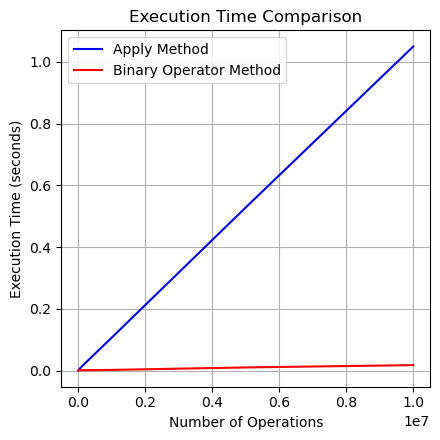

In [14]:
def measure_times(size):
    age = np.random.choice([25, 100], size=(size, 1))
    df = pd.DataFrame(age, columns=['Age'])

    # Method 1: Apply method
    start_ap = time.time()
    df['is_young_apply_method'] = df.Age.apply(lambda x: x <= 25).astype(int)
    end_ap = time.time()
    time_ap = end_ap - start_ap

    # Method 2: Binary operator method
    start_bi = time.time()
    df['is_young_binary_operator_method'] = df.Age.le(25).astype(int)
    end_bi = time.time()
    time_bi = end_bi - start_bi

    return size, time_ap, time_bi

sizes = [1000, 10000, 100000, 1000000, 5000000, 10000000]
results = [measure_times(size) for size in sizes]
results_df = pd.DataFrame(results, columns=['Size', 'Apply Method Time', 'Binary Operator Method Time'])

plt.figure(figsize=(4.5, 4.5))
plt.plot(results_df['Size'], results_df['Apply Method Time'], linestyle='-', linewidth=1.5, color='b', label='Apply Method')
plt.plot(results_df['Size'], results_df['Binary Operator Method Time'], linestyle='-', linewidth=1.5, color='r', label='Binary Operator Method')
plt.title('Execution Time Comparison')
plt.xlabel('Number of Operations')
plt.ylabel('Execution Time (seconds)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Like & Subscribe @mattopml on YouTube